In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#### Company Data

In [286]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


##### Descriptive Statistics

In [287]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [288]:
df.shape

(400, 11)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [290]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


##### EDA

In [291]:
#Checking if null values present
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [292]:
#Checking if duplicate rows are resent
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [293]:
# Checking if any duplicate column is present
df.T.duplicated()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

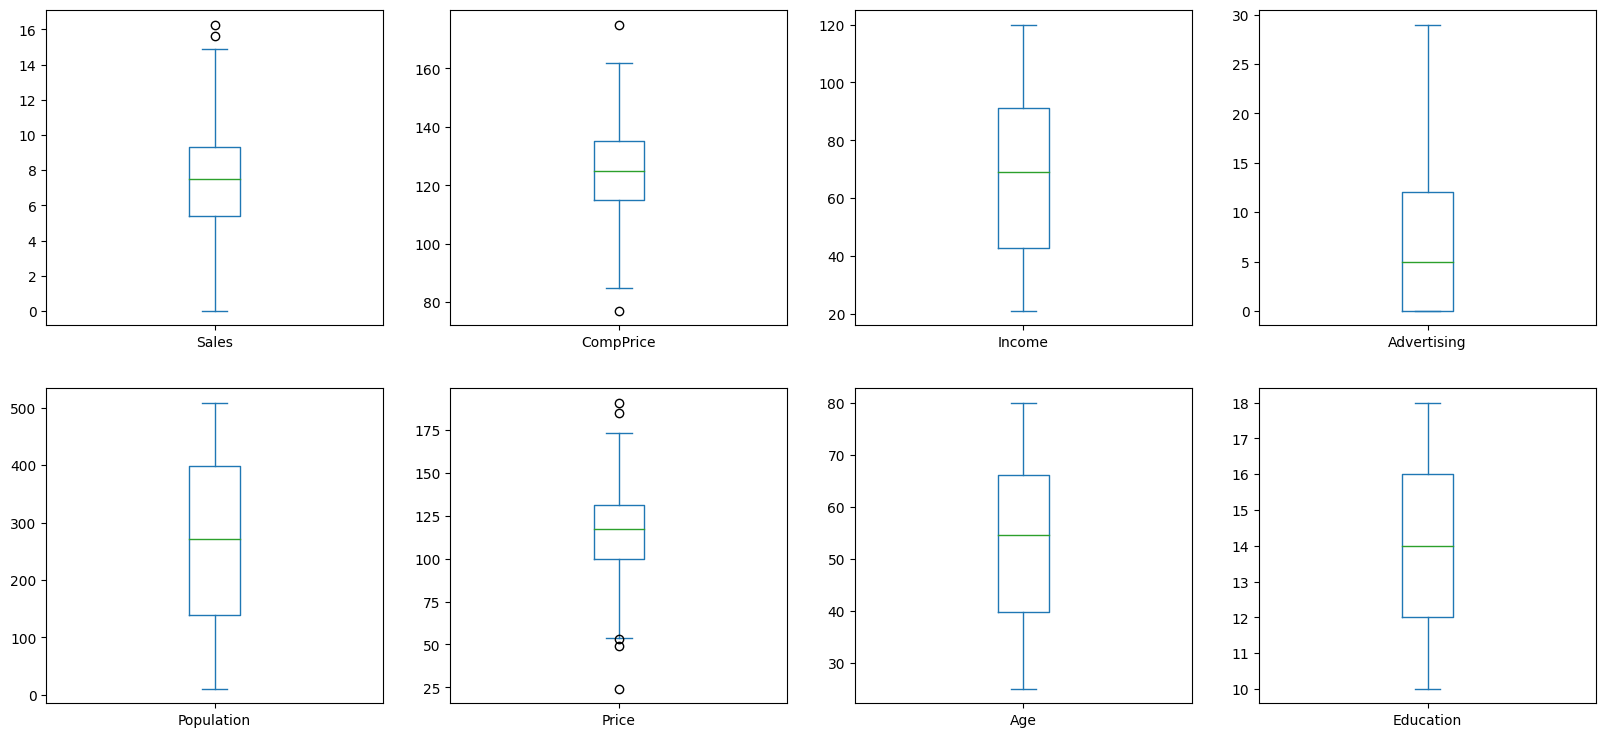

In [294]:
#Boxplot
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(20,9))
plt.show()

        in above boxplot three features exhibit 2-4 outliers, while the density plot below indicates a nearly normal distribution with minor variations. This suggests that while outliers exist, they have limited impact on the overall data distribution and trends.

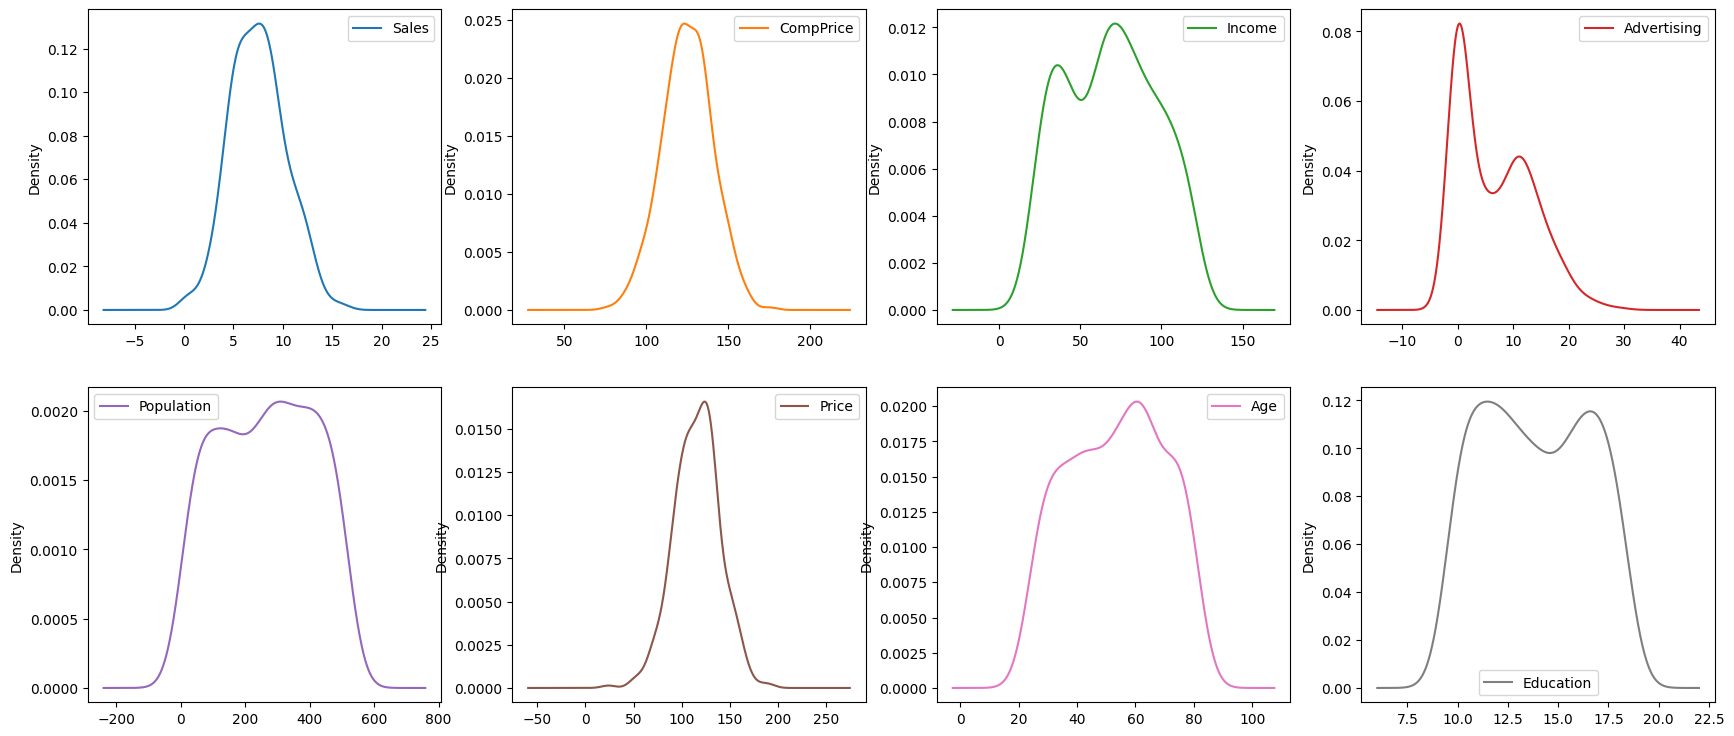

In [295]:
# Density plot
df.plot(kind='density',subplots=True,layout=(2,4),sharex=False, figsize=(21,9))
plt.show()

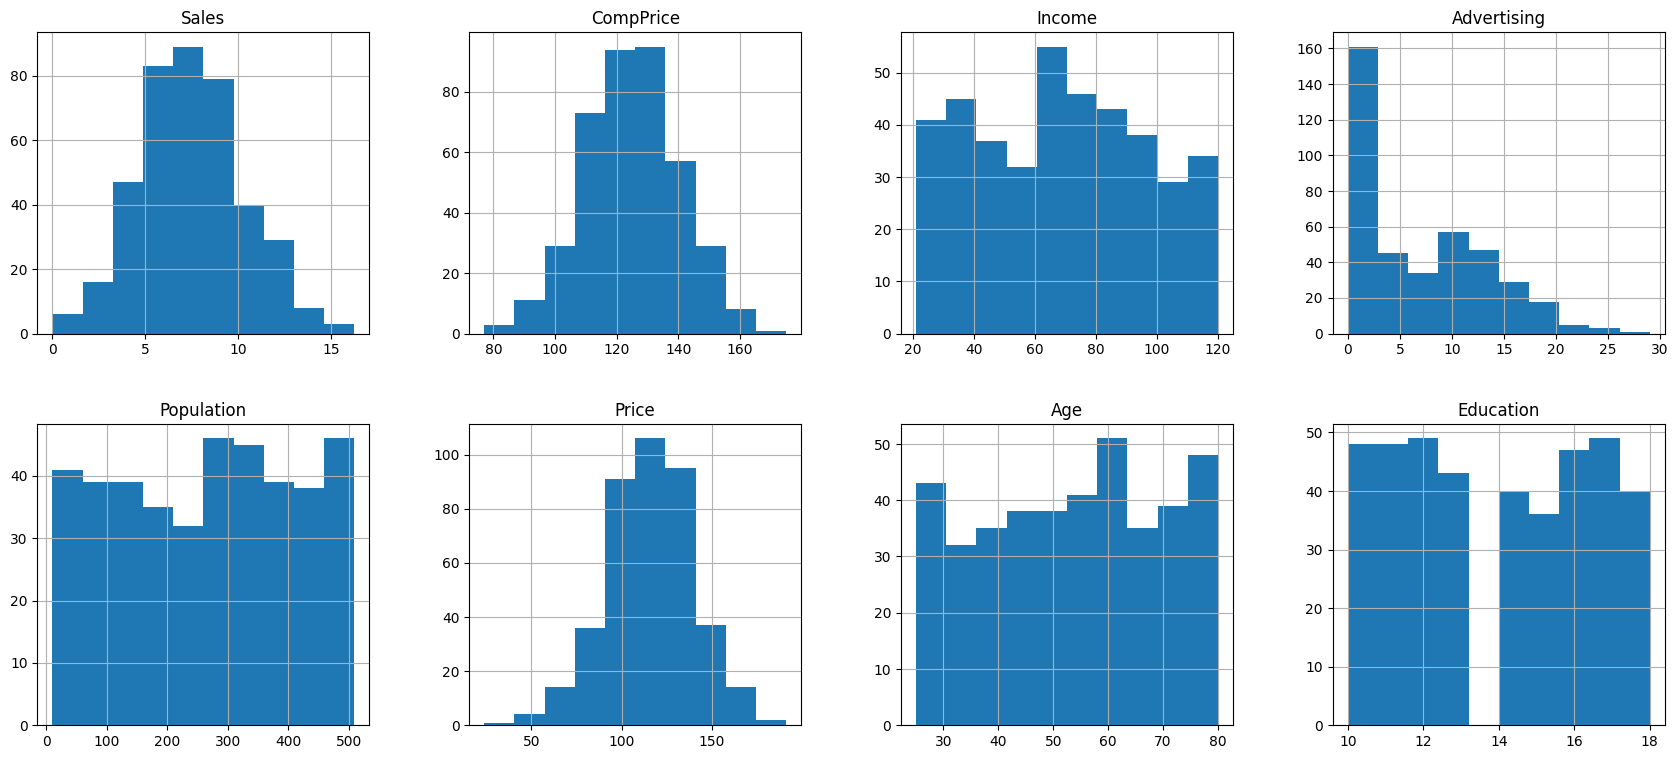

In [296]:
#Histogram
df.hist(figsize=(21,9),layout=(2,4))
plt.show()

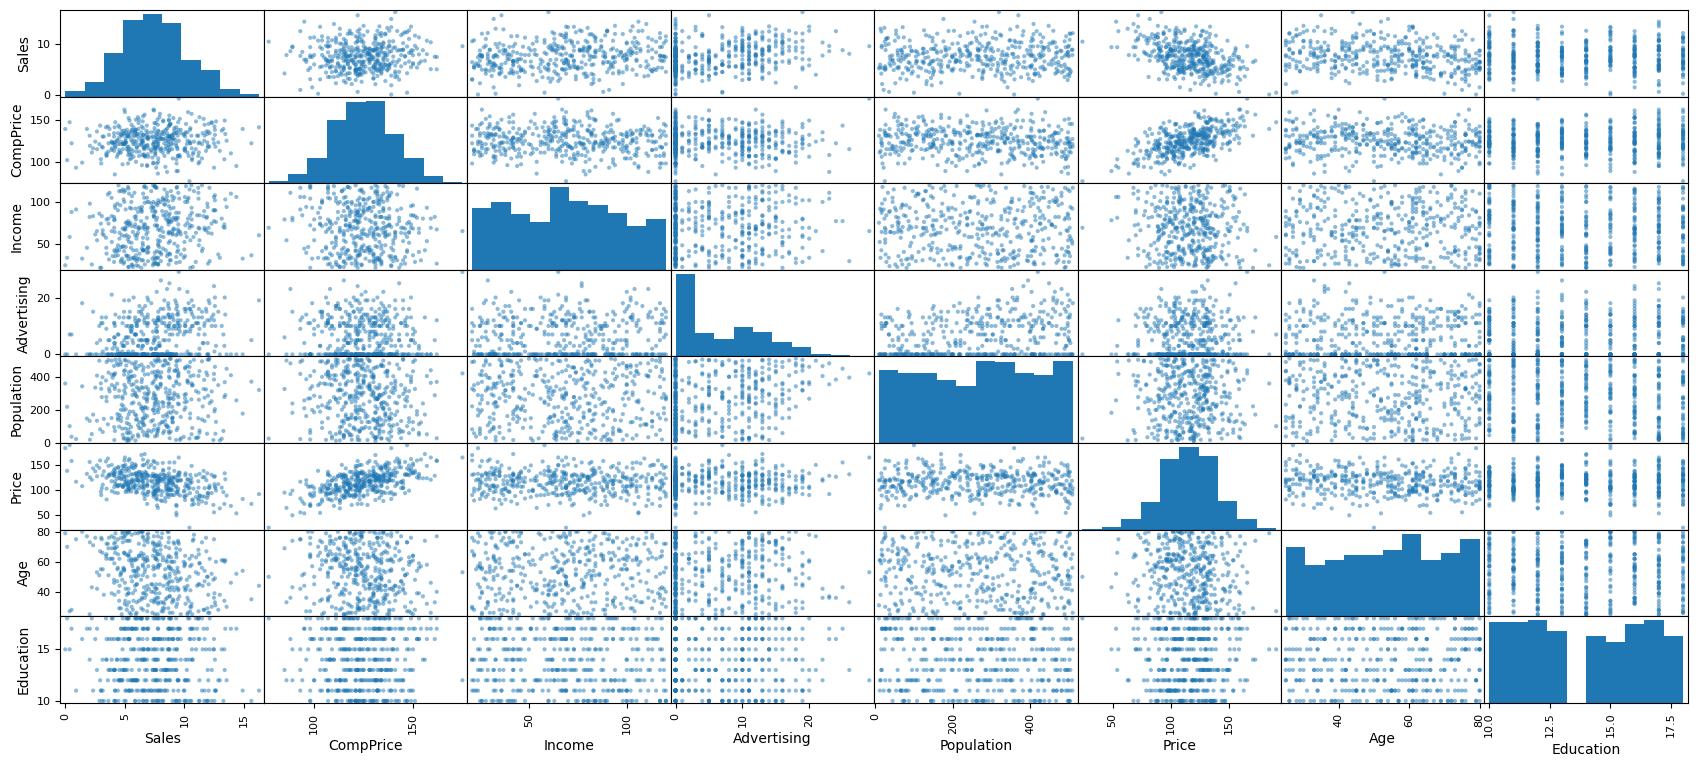

In [297]:
#Scatterplot
scatter_matrix(df,figsize=(21,9))
plt.show()

        Here, Price and Sales shows the correlation in negative direction which means while increases the sales is decreased.
        While CompPrice and Price shows positive correlation which means while competitor increases the price the price gets increased.

##### Feature Engineering

In [298]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [299]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [300]:
# Checking minimum and maximum Sales
print(df.Sales.min())
print(df.Sales.max())


0.0
16.27


In [301]:
# Defining the thresholds for categorization
low_threshold = 6.0
high_threshold = 10.0

# Converting "Sales" column to categorical based on the thresholds
df['SalesCategory'] = df['Sales'].apply(lambda x: 'Low' if x < low_threshold else ('Average' if x < high_threshold else 'High'))
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Average
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Average
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Average
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Average
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [302]:
# Selecting the columns to be standardized
df1 = df.iloc[:,1:]
# Creating a StandardScaler object
scaler = StandardScaler()

for i in df1.columns:
    if df1[i].dtypes == 'float64' or df1[i].dtypes == 'int64':
        # Applying standardization to the selected columns
        df1[i] = scaler.fit_transform(df1[i].values.reshape(-1, 1))
df1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,0.850455,0.155361,0.657177,0.075819,0.177823,Bad,-0.699782,1.184449,Yes,Yes,Average
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,Good,0.721723,-1.490113,Yes,Yes,High
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,Medium,0.350895,-0.725953,Yes,Yes,High
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,Medium,0.103677,0.038208,Yes,Yes,Average
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,Bad,-0.947000,-0.343872,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,Good,-1.256023,0.038208,Yes,Yes,High
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,Medium,0.103677,-1.108033,No,Yes,Average
397,2.417512,-1.526151,0.807733,0.700853,1.827078,Medium,-0.823391,1.566529,Yes,Yes,Average
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,Bad,-0.205346,-0.725953,Yes,Yes,Low


In [303]:
for i in df1.columns:
    if df1[i].dtypes == 'object':
        print(df1[i].unique())
        print('\n')

['Bad' 'Good' 'Medium']


['Yes' 'No']


['Yes' 'No']


['Average' 'High' 'Low']




In [304]:
# Mapping the ShelveLoc, Urban, and US column with numbers such as Bad will be mapped as 0, Medium as 1 and Good as 2. 
# Same way for Urban and US, No will be mapped as 0, and Yes as 1.

shelve_ = ['Bad','Medium','Good']
urban_ = ['No','Yes']
us_ = ['No','Yes']
# Creating a custom mapping for ShelveLoc, Urban, and US to numbers
shelve_mapping = {shelve: i for i, shelve in enumerate(shelve_)}
urban_mapping = {urban: i for i, urban in enumerate(urban_)}
us_mapping = {us: i for i,us in enumerate(us_)}
# Applying the custom mapping
df1['ShelveLoc'] = df1['ShelveLoc'].map(shelve_mapping)
df1['Urban'] = df1['Urban'].map(urban_mapping)
df1['US'] = df1['US'].map(us_mapping)
df1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1,Average
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,2,0.721723,-1.490113,1,1,High
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,1,0.350895,-0.725953,1,1,High
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,1,0.103677,0.038208,1,1,Average
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,0,-0.947000,-0.343872,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,2,-1.256023,0.038208,1,1,High
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,1,0.103677,-1.108033,0,1,Average
397,2.417512,-1.526151,0.807733,0.700853,1.827078,1,-0.823391,1.566529,1,1,Average
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,0,-0.205346,-0.725953,1,1,Low


In [305]:
X = df1.drop(['SalesCategory'],axis=1)
y = df1['SalesCategory']
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,2,0.721723,-1.490113,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,1,0.350895,-0.725953,1,1
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,1,0.103677,0.038208,1,1
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,0,-0.947000,-0.343872,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,2,-1.256023,0.038208,1,1
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,1,0.103677,-1.108033,0,1
397,2.417512,-1.526151,0.807733,0.700853,1.827078,1,-0.823391,1.566529,1,1
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,0,-0.205346,-0.725953,1,1


In [306]:
y

0      Average
1         High
2         High
3      Average
4          Low
        ...   
395       High
396    Average
397    Average
398        Low
399    Average
Name: SalesCategory, Length: 400, dtype: object

##### Model Building

In [320]:
#Random Forest Classifier
kfold = KFold(n_splits=10,random_state=0, shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=4, criterion='gini')
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.6875


        Using a Random Forest Classifier with 10-fold cross-validation, the model achieved an average accuracy of approximately 68.75%. This suggests that the model can predict the SalesCategory (Log, Average, High) based on the given independent variables with reasonable accuracy.

In [308]:
print(results.std())

0.052737557774322465


In [309]:
m=model.fit(X,y)
y_pred = m.predict(X)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[191   0   0]
 [  0  79   0]
 [  0   0 130]]
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00       191
        High       1.00      1.00      1.00        79
         Low       1.00      1.00      1.00       130

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [323]:
#Bagging
kfold = KFold(n_splits=10,random_state=0, shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(estimator=cart, n_estimators=1000,random_state=0)
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.7025


         Using BaggingClassifier analysis with a Decision Tree base estimator and 10-fold cross-validation, the model achieved an average accuracy of approximately 70.25%. This indicates that the Bagging ensemble technique has improved the predictive performance compared to the Random Forest model in the previous scenario (which had an accuracy of 68.75%).

In [324]:
#AdaBoost Classifier
kfold = KFold(n_splits=10,random_state=0, shuffle=True)
model=AdaBoostClassifier(n_estimators=1000, random_state=0)
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.7525000000000001


        Using AdaBoost Classifier analysis with 10-fold cross-validation and 1000 estimators, the model achieved an average accuracy of approximately 75.25%. This suggests that AdaBoost has further improved predictive performance compared to both the Random Forest and Bagging models in previous scenarios (68.75% and 70.25%, respectively).

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10,random_state=0, shuffle=True)

estimators = []
model1 = LogisticRegression(max_iter=1000)
estimators.append(('logistic',model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart',model2))
model3 = SVC()
estimators.append(('svm',model3))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble,X,y,cv=kfold)
print(results.mean())

0.7675


        Using VotingClassifier analysis, which combines Logistic Regression, Decision Tree, and Support Vector Machine (SVM) models, with 10-fold cross-validation, the ensemble achieved an average accuracy of approximately 76.75%. This indicates that the ensemble approach has further improved predictive performance compared to the previous models.

In [258]:
# Below are the estimators for VotingClassifier

estimators

[('logistic', LogisticRegression(max_iter=1000, solver='liblinear')),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

#### Fraud Check

In [333]:
df  =pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [334]:
df.rename(columns={'Marital.Status':'MaritalStatus','Taxable.Income':'TaxableIncome','City.Population':'CityPopulation','Work.Experience':'WorkExperience'},inplace=True)
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


##### Descriptive Statistics

In [335]:
df.dtypes

Undergrad         object
MaritalStatus     object
TaxableIncome      int64
CityPopulation     int64
WorkExperience     int64
Urban             object
dtype: object

In [336]:
df.shape

(600, 6)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   MaritalStatus   600 non-null    object
 2   TaxableIncome   600 non-null    int64 
 3   CityPopulation  600 non-null    int64 
 4   WorkExperience  600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [338]:
df.describe()

,TaxableIncome,CityPopulation,WorkExperience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


##### EDA

In [339]:
#Checking if null values are present in the data
df.isna().sum()

Undergrad         0
MaritalStatus     0
TaxableIncome     0
CityPopulation    0
WorkExperience    0
Urban             0
dtype: int64

In [340]:
#checking duplicate rows
df[df.duplicated()]

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban


In [341]:
#checking duplicate columns
df.T.duplicated()

Undergrad         False
MaritalStatus     False
TaxableIncome     False
CityPopulation    False
WorkExperience    False
Urban             False
dtype: bool

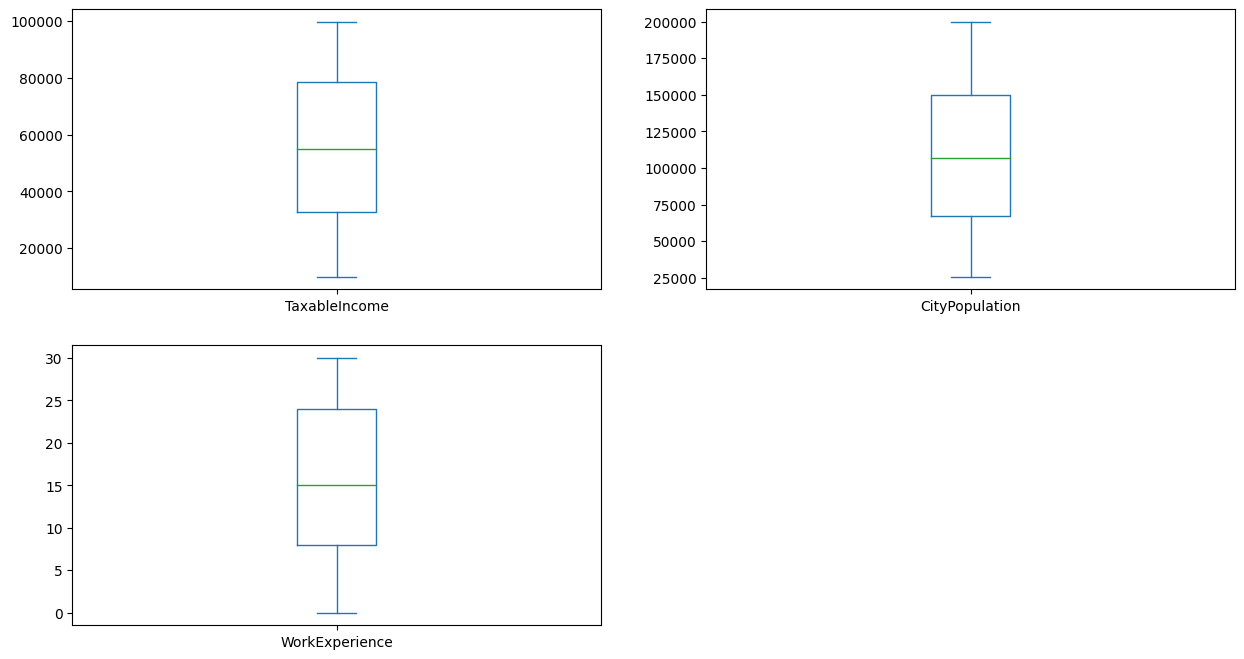

In [342]:
# Boxpplot
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(15,8))
plt.show()

        The above plotted boxplot with no outliers indicates that the data for the variable is relatively consistent and lacks extreme or abnormal values. This suggests a stable and normally distributed dataset with low variability, making it suitable for analysis and modeling.

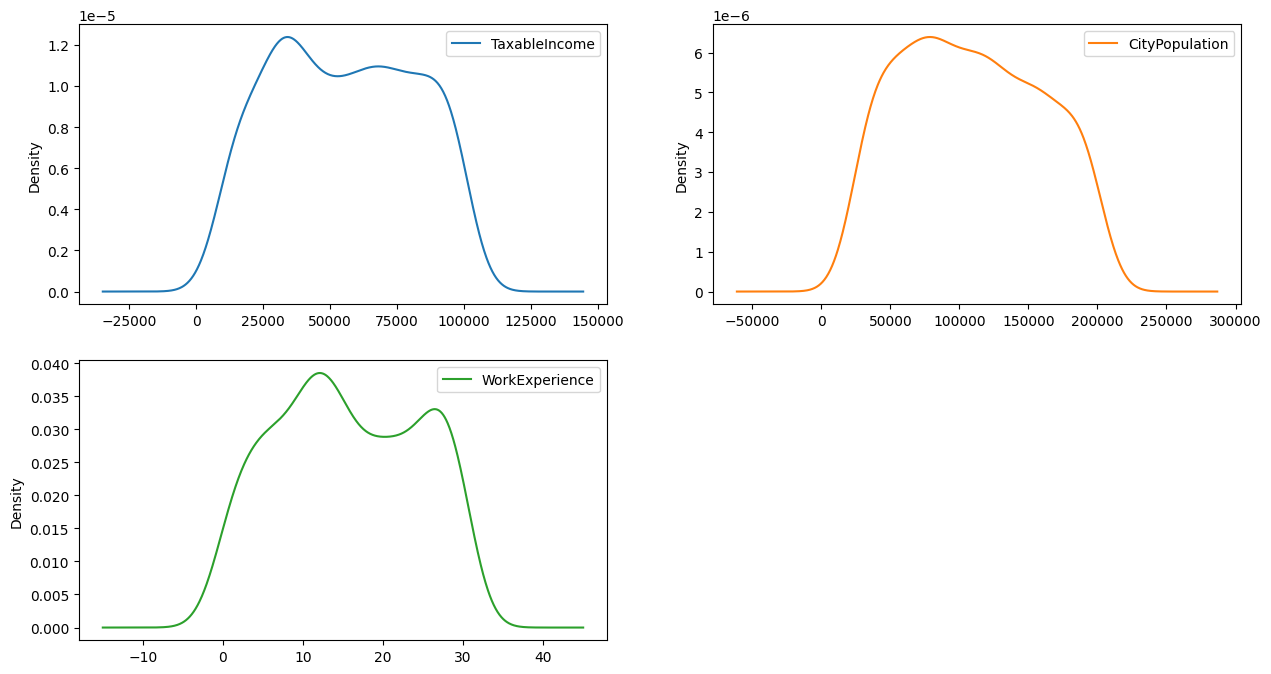

In [343]:
#Density plot
df.plot(kind='density',subplots=True,layout=(2,2),sharex=False, figsize=(15,8))
plt.show()

        Here, we can see the data is almost normally distributed in the density plot

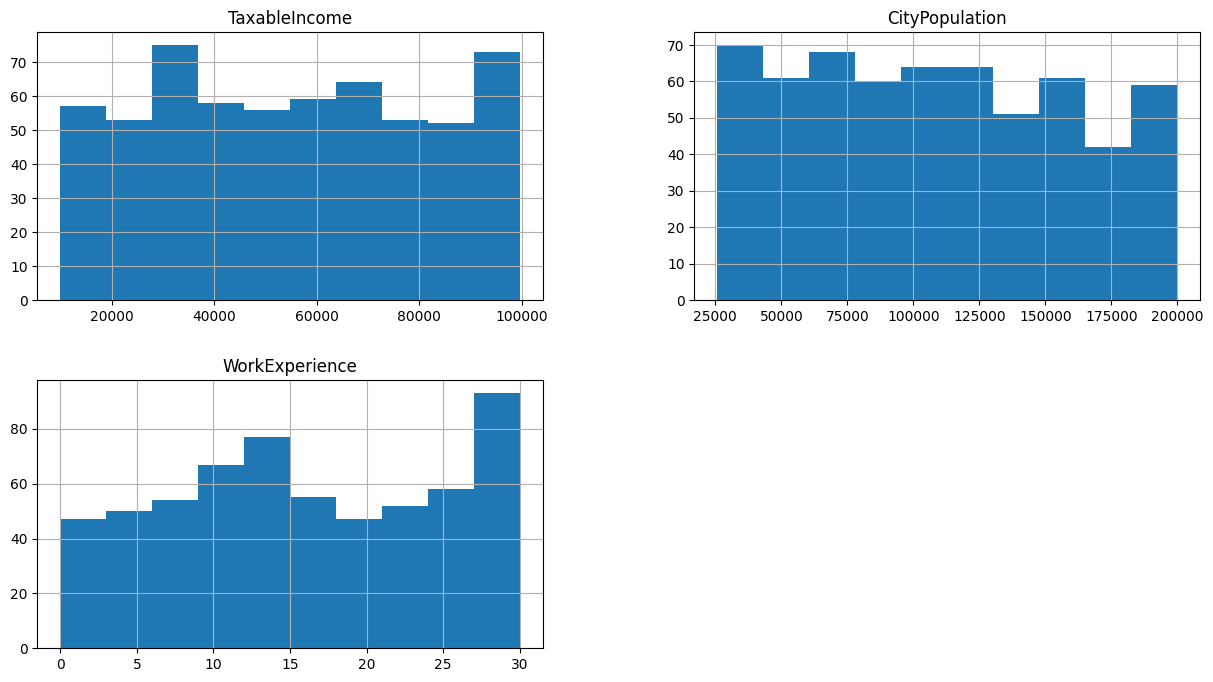

In [344]:
df.hist(figsize=(15,8))
plt.show()

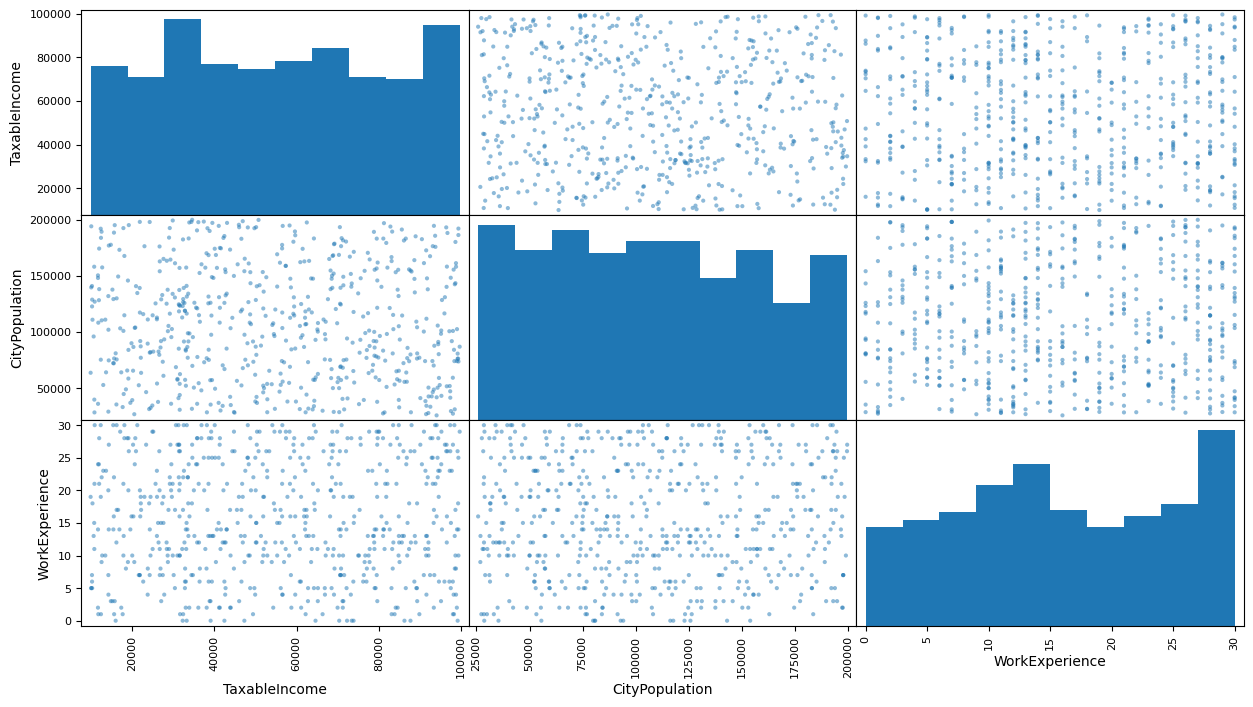

In [345]:
scatter_matrix(df,figsize=(15,8))
plt.show()

        We, can interpret that there is no correlation between the variables

##### Feature Engineering

In [346]:
df.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [347]:
# Defining the thresholds for categorization
threshold = 30000

# Converting "Sales" column to categorical based on the thresholds
df['TaxableIncome'] = df['TaxableIncome'].apply(lambda x: 'Risky' if x <= threshold else 'Good')
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [348]:
df.dtypes

Undergrad         object
MaritalStatus     object
TaxableIncome     object
CityPopulation     int64
WorkExperience     int64
Urban             object
dtype: object

In [349]:
# Creating a StandardScaler object to standardize the data
scaler = StandardScaler()

for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        # Applying standardization to the selected columns
        df[i] = scaler.fit_transform(df[i].values.reshape(-1, 1))
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,Good,-1.178521,-0.629143,YES
1,YES,Divorced,Good,0.508500,0.276370,YES
2,NO,Married,Good,1.033109,1.634639,YES
3,YES,Single,Good,1.696831,-0.063197,YES
4,NO,Married,Good,-1.630532,1.408261,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,-1.390432,-0.968710,YES
596,YES,Divorced,Good,-1.071672,-1.534655,YES
597,NO,Divorced,Good,0.909696,-1.761033,YES
598,YES,Married,Good,1.432197,0.163181,NO


In [350]:
#Checking unique values of categorical columns
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].unique())
        print('\n')

['NO' 'YES']


['Single' 'Divorced' 'Married']


['Good' 'Risky']


['YES' 'NO']




In [351]:
#Encoding columns to integers

col_to_encode = ['Undergrad','MaritalStatus','Urban']
le = LabelEncoder()
df[col_to_encode] = le.fit_transform(col_to_encode)
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,1,0,Good,-1.178521,-0.629143,2
1,1,0,Good,0.508500,0.276370,2
2,1,0,Good,1.033109,1.634639,2
3,1,0,Good,1.696831,-0.063197,2
4,1,0,Good,-1.630532,1.408261,2
...,...,...,...,...,...,...
595,1,0,Good,-1.390432,-0.968710,2
596,1,0,Good,-1.071672,-1.534655,2
597,1,0,Good,0.909696,-1.761033,2
598,1,0,Good,1.432197,0.163181,2


In [352]:
#Splitting dependent and independent variables

X = df.drop(['TaxableIncome'],axis=1)
y = df['TaxableIncome']
X

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,1,0,-1.178521,-0.629143,2
1,1,0,0.508500,0.276370,2
2,1,0,1.033109,1.634639,2
3,1,0,1.696831,-0.063197,2
4,1,0,-1.630532,1.408261,2
...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,2
596,1,0,-1.071672,-1.534655,2
597,1,0,0.909696,-1.761033,2
598,1,0,1.432197,0.163181,2


In [353]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxableIncome, Length: 600, dtype: object

##### Model Building

In [354]:
#Random Forest Classifier
kfold = KFold(n_splits=10,random_state=0, shuffle=True)
model = RandomForestClassifier(n_estimators=1500, max_features=3, criterion='gini')
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())
print(results.std())

0.7116666666666667
0.06833333333333334


        Using Random Forest Classifier model achieved an average accuracy of approximately 71.17% with a standard deviation of approximately 6.79% across 10-fold cross-validation. This indicates that the model is performing reasonably well in predicting whether individuals have a "Risky" or "Good" taxable income based on the given features.

In [355]:
m=model.fit(X,y)
y_pred = m.predict(X)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[476   0]
 [  0 124]]
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       476
       Risky       1.00      1.00      1.00       124

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [356]:
#Bagging
kfold = KFold(n_splits=10,random_state=0, shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(estimator=cart, n_estimators=1000,random_state=0)
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())
print(results.std())

0.71
0.061553951042064646


        The Bagging Classifier model, using a Decision Tree base estimator with 2000 estimators, achieved an average accuracy of approximately 71% with a standard deviation of around 6.19% across 10-fold cross-validation. This performance is similar to the Random Forest model, indicating its effectiveness in predicting "Risky" or "Good" taxable income. Further optimization opportunities may exist to enhance model performance.

In [357]:
#AdaBoost Classifier
kfold = KFold(n_splits=10,random_state=0, shuffle=True)
model=AdaBoostClassifier(n_estimators=1000, random_state=0)
results = cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.7316666666666667


        The AdaBoost Classifier, using 1000 estimators, achieved an average accuracy of approximately 73.17% across 10-fold cross-validation. This demonstrates its effectiveness in predicting whether individuals have a "Risky" or "Good" taxable income based on the given features. AdaBoost appears to outperform the previously tested models, showing promise as a suitable choice for this classification task.

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10,random_state=0, shuffle=True)

estimators = []
model1 = LogisticRegression(max_iter=1000)
estimators.append(('logistic',model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart',model2))
model3 = SVC()
estimators.append(('svm',model3))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble,X,y,cv=kfold)
print(results.mean())

0.7933333333333332


        The ensemble model, combining Logistic Regression, Decision Tree, and Support Vector Machine classifiers, achieved an impressive average accuracy of approximately 79.33% across 10-fold cross-validation. This suggests that the ensemble approach can effectively predict whether individuals have a "Risky" or "Good" taxable income based on the given features. The ensemble method appears to outperform individual models and is a strong choice for this classification task.

In [285]:
#Here are the estimators that i have used
estimators

[('logistic', LogisticRegression(max_iter=1000)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]